<a href="https://colab.research.google.com/github/Robinino99/Prediction-of-Product-Sales/blob/main/Project_1_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 2 (Core)

In [24]:
# load the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# import various packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# store file path for datasource in variable (fname)
fname = '/content/drive/MyDrive/Coding Dojo/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

#read the new datasource into pandas

df_sales = pd.read_csv(fname)

In [27]:
# info regarding the new dataframe
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [28]:
# View the 5 five rows of dataframe
df_sales.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


####1. How many rows and columns?

In [29]:
# determine the number of rows, columns of dataframe
df_sales.shape

(8523, 12)

#### 2. What are the datatypes of each variable

In [30]:
# determine the datatypes of each variable
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

####3. Are there duplicate values?

In [31]:
# create a filter to house all duplicated rows if any

duplicated_rows = df_sales.duplicated()
# Get a sum of all the duplicated rows via the filter above

duplicated_rows.sum()

0

####4. Are there missing values?

In [32]:
# get the number of null values for all columns
num_nulls = df_sales.isna().sum()
num_nulls

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
# Create a list of categorical columns
categorical_columns = df_sales.select_dtypes('object').columns
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [34]:
# using the list of categorical columns above, fill with placeholder value
#df_sales[categorical_columns] = df_sales[categorical_columns].fillna('NaN')
# check that the columns have been filled
#df_sales[categorical_columns].value_counts(dropna=False)

In [35]:
# Create a list for all numeric columns
numeric_columns = df_sales.select_dtypes('number').columns

In [36]:
# default all missing number values to 999

#df_sales[numeric_columns] = df_sales[numeric_columns].fillna('999')

<Axes: >

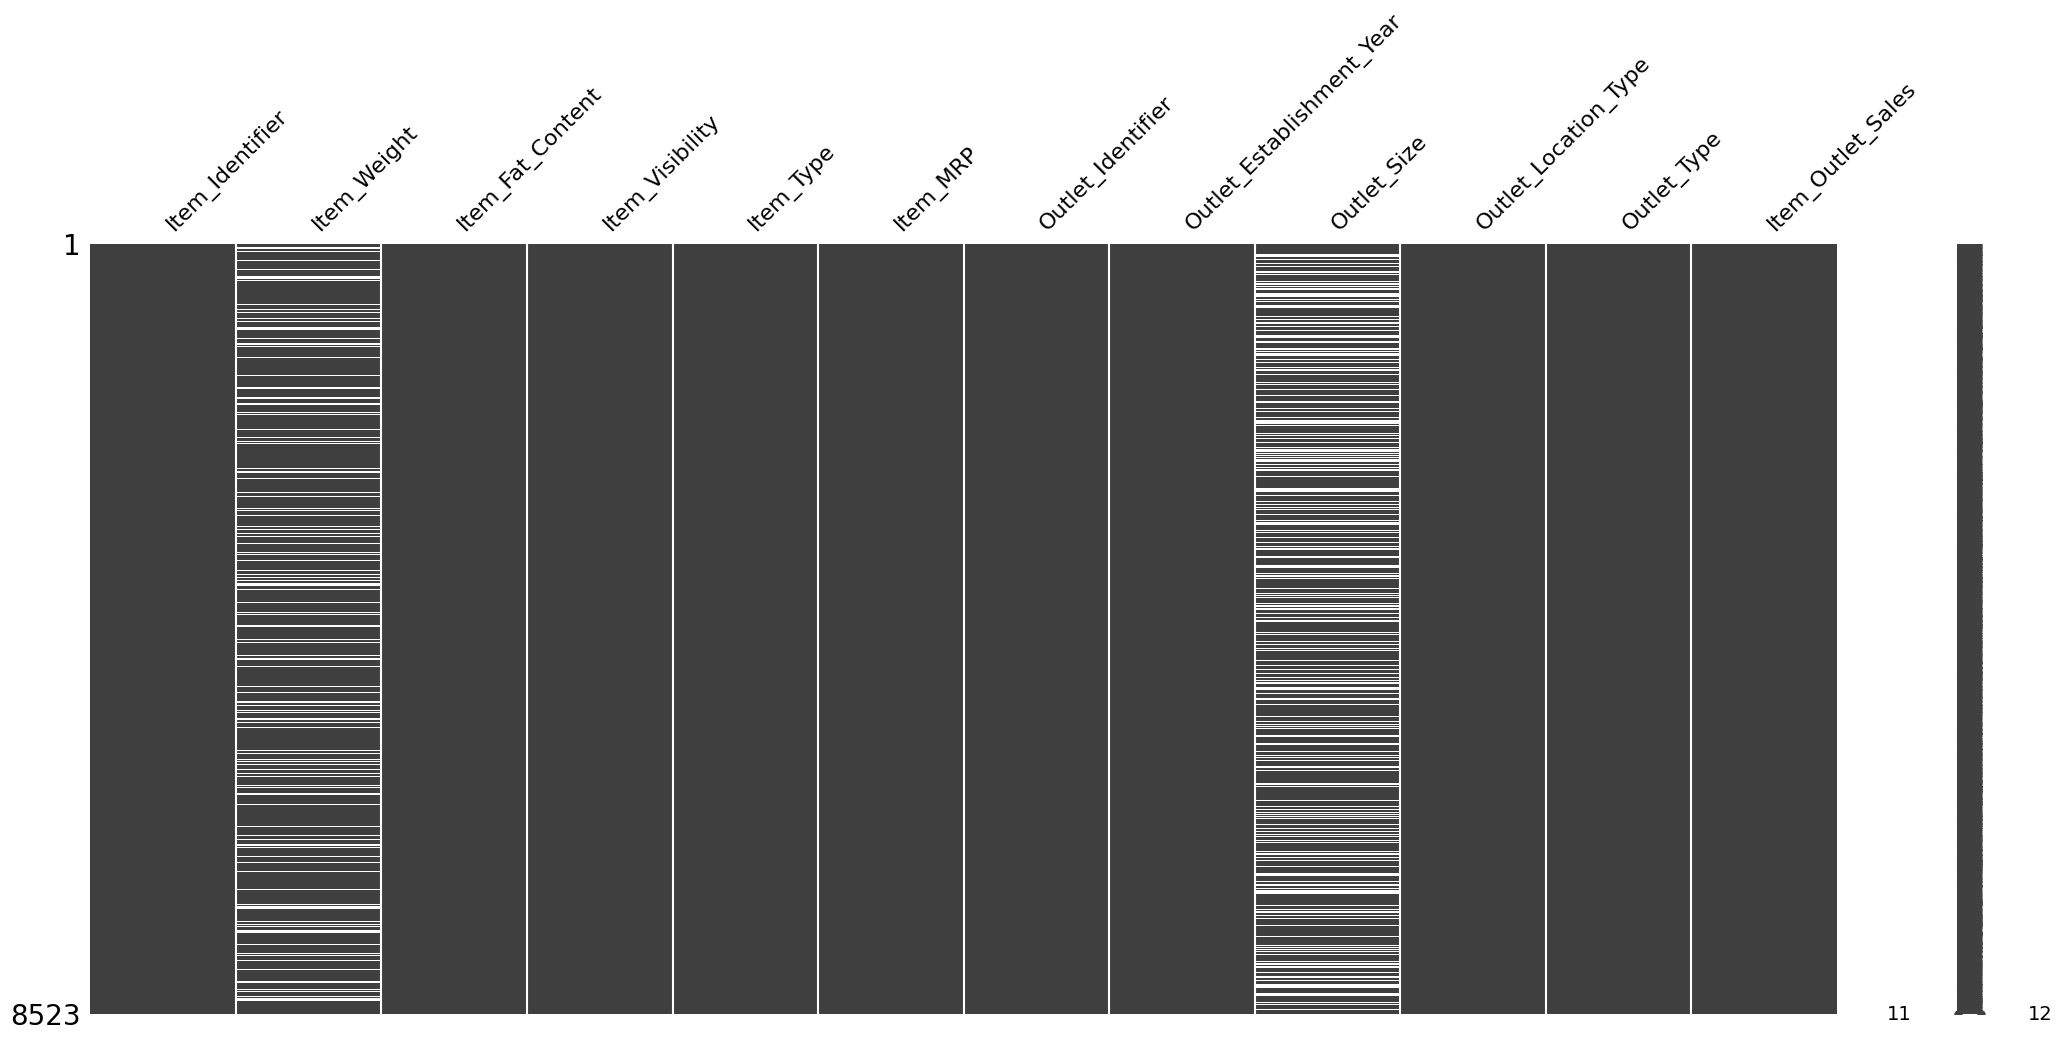

In [37]:
# check that all columns have no missing values

import missingno as msno
msno.matrix(df_sales)

In [38]:
# Save list of object columns

obj_columns = df_sales.select_dtypes('object')


In [39]:
# create a loop to work through each value per column
for col in obj_columns:
  print(f"Value counts for {col}")
  print(df_sales[col].value_counts())
  # enhance legability
  print('\n')

Value counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [40]:
# Validate inconsistencits in the [Item Fat Content] column
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [41]:
# Repace the 'LF' & 'reg' values to Low Fat & Regular
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular','low fat':'Low Fat'})

In [42]:
# create a list of numeric columns
num_cols = df_sales.select_dtypes('number').columns


In [43]:
# create a for loop to process the numeric columns and print the min, mean, max

for col in num_cols:
  min = df_sales[col].min()
  mean = df_sales[col].mean()
  max = df_sales[col].max()
  # store the above values in a single variable for printing
  message = (f"For the column named {col}\n"
             f"The min value is {min}\n"
             f"The mean value is {mean}\n"
             f"The maximum value is {max}\n" )
  print(message)
  # create a new line to ease legibility
  print("\n")

For the column named Item_Weight
The min value is 4.555
The mean value is 12.857645184135976
The maximum value is 21.35



For the column named Item_Visibility
The min value is 0.0
The mean value is 0.06613202877895108
The maximum value is 0.328390948



For the column named Item_MRP
The min value is 31.29
The mean value is 140.9927819781767
The maximum value is 266.8884



For the column named Outlet_Establishment_Year
The min value is 1985
The mean value is 1997.8318667135984
The maximum value is 2009



For the column named Item_Outlet_Sales
The min value is 33.29
The mean value is 2181.288913575032
The maximum value is 13086.9648





#Project 1 - Part 4 (Core)


##Univaritive EDA Functions

In [19]:
# Univariative Plotting functions
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

##Multivariative Feature vs Target

In [20]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

###Data Dictionary

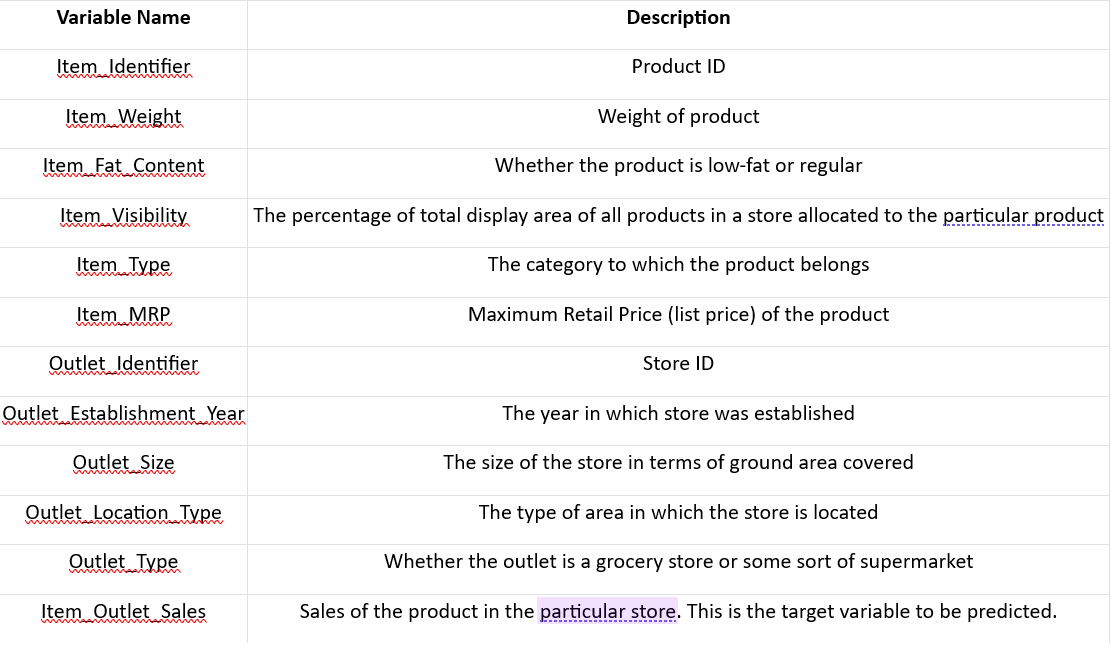

## Item_Weight Feature

- Feature Name: Item_Weight  

In [21]:
# # Confirming the dtype to select correct EDA function
feature = 'Item_Weight'
#
df_sales[feature].dtype

dtype('float64')

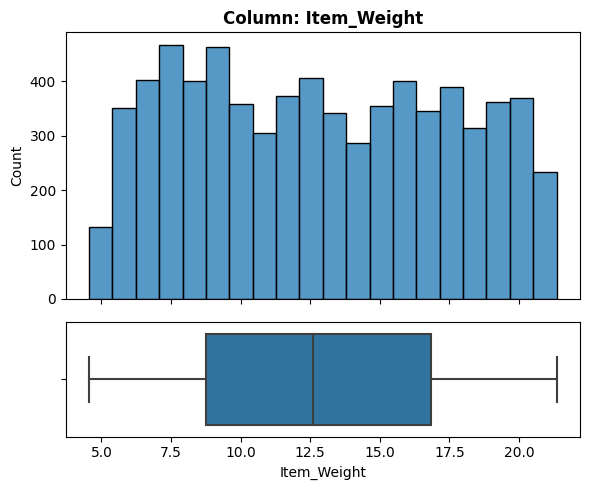

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  * 1463 null values and 17.17% is null.
  * There is no dedicated suggestion on how to handle NaN values in the data dictionary. As per our function we have defaulted it to 'MISSING'.


3. Is the feature constant or quasi-constant?
  * The feature is neither constant or quasi-constant.
  * The feature will remain in the dataset.

4. What is the cardinality? Is it high?
  * N/A

5. Would we know this BEFORE the target is determined?
  *  Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  * No.



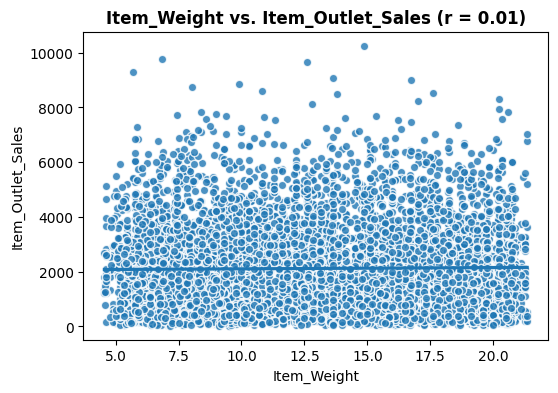

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    * No. The weight of the product does vary but it is not directly linked to volume of sales.
  - Does this feature appear to be a predictor of the target?
    * No, as indicated by the low correlation between the weight of the item to sales.

___

##Item_Fat_Content

In [44]:
# # Confirming the dtype to select correct EDA function
feature = 'Item_Fat_Content'
#
df_sales[feature].dtype

dtype('O')

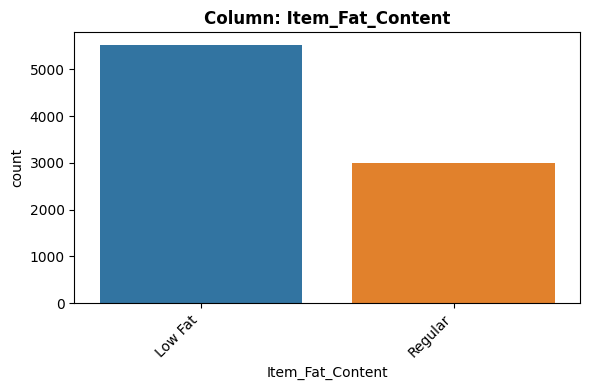

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [45]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Categorical Nominal.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  * 0 nulls.
  *


3. Is the feature constant or quasi-constant?
  * The feature is neither constant or quasi-constant.
  * The feature will remain in the dataset.

4. What is the cardinality? Is it high?
  * Low as there is only 2 unique values.

5. Would we know this BEFORE the target is determined?
  *  Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  * No.



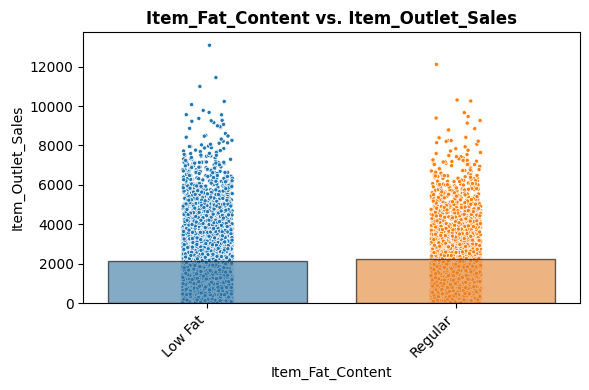

In [46]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    * No.
  - Does this feature appear to be a predictor of the target?
    * No, as indicated above in the stripplot. The sales are split pretty evenly with a slight edge to the regular fat content variation.

___

##Item_Visibility

In [47]:
# # Confirming the dtype to select correct EDA function
feature = 'Item_Visibility'
#
df_sales[feature].dtype

dtype('float64')

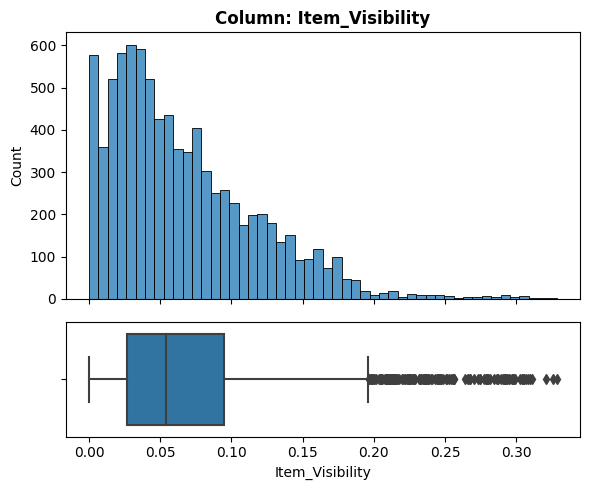

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [48]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  * 0 nulls.
  * No need to impute values.


3. Is the feature constant or quasi-constant?
  * The feature is neither constant or quasi-constant.
  * The feature will remain in the dataset.

4. What is the cardinality? Is it high?
  N/A

5. Would we know this BEFORE the target is determined?
  *  Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  * No.



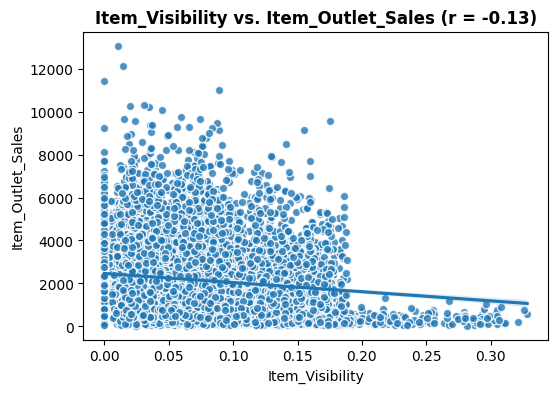

In [49]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    * Yes, if items advertised or brought to a customers' attention should improve sales.
  - Does this feature appear to be a predictor of the target?
    * No, as depicted in the above there is a negative correlation between item visibility and item sales.

##Item_Type

In [50]:
# # Confirming the dtype to select correct EDA function
feature = 'Item_Type'
#
df_sales[feature].dtype

dtype('O')

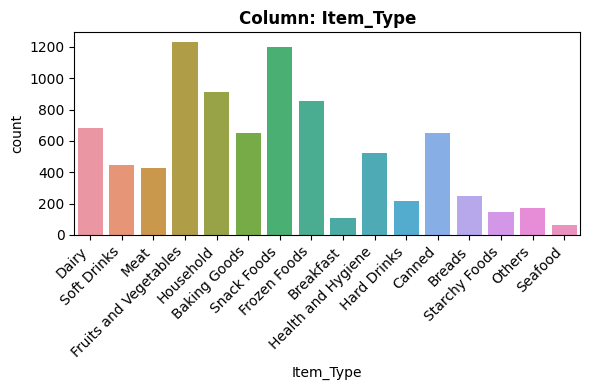

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [51]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  * 0 nulls.
  * No need to impute values.


3. Is the feature constant or quasi-constant?
  * The feature is neither constant or quasi-constant.
  * The feature will remain in the dataset.

4. What is the cardinality? Is it high?
  * High as it is over our threshold of 10.

5. Would we know this BEFORE the target is determined?
  *  Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  * No.



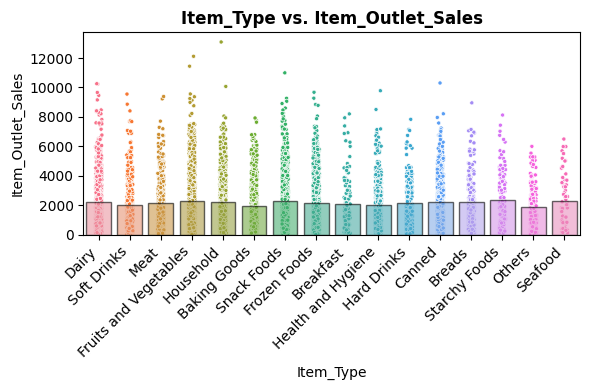

In [53]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    * Yes, the multiple item types (offerings) that we could discren which item sells the best.
  - Does this feature appear to be a predictor of the target?
    * Yes, in the distribution above the sales seems to be almost evenly spread across the items.

##Item_MRP

In [54]:
# # Confirming the dtype to select correct EDA function
feature = 'Item_MRP'
#
df_sales[feature].dtype

dtype('float64')

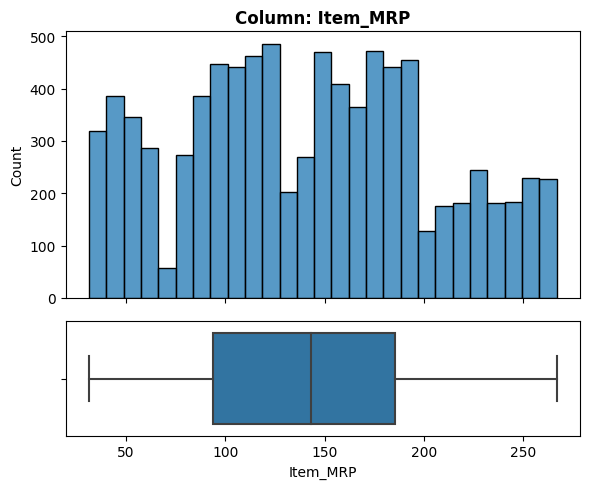

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [55]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  * 0 nulls.
  * No need to impute values.


3. Is the feature constant or quasi-constant?
  * The feature is neither constant or quasi-constant.
  * The feature will remain in the dataset.

4. What is the cardinality? Is it high?
  * High as it is over our threshold of 10.

5. Would we know this BEFORE the target is determined?
  *  Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  * No.



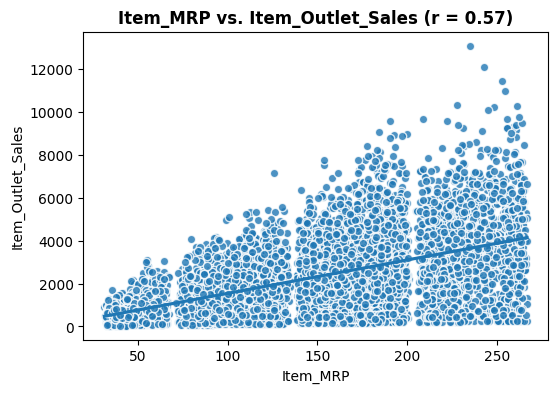

In [57]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    * Yes, the price of an item would always determine whether a sale is made or not.
  - Does this feature appear to be a predictor of the target?
    * Yes, there is a strong corrleation between the price of the item and item outlet sales.
    * As the price (item_MRP) increases, the outlet sales do too.

##Outlet_Establishment_Year


In [58]:
# # Confirming the dtype to select correct EDA function
feature = 'Outlet_Establishment_Year'
#
df_sales[feature].dtype

dtype('int64')

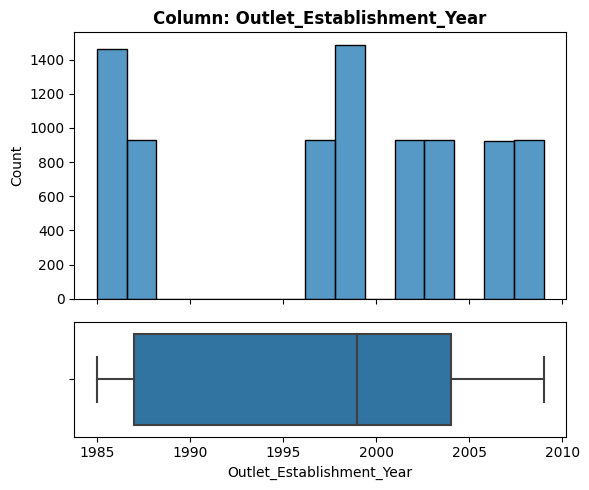

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [59]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  * 0 nulls.
  * No need to impute values.


3. Is the feature constant or quasi-constant?
  * The feature is neither constant or quasi-constant.
  * The feature will remain in the dataset.

4. What is the cardinality? Is it high?
  N/A

5. Would we know this BEFORE the target is determined?
  *  Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  * No.



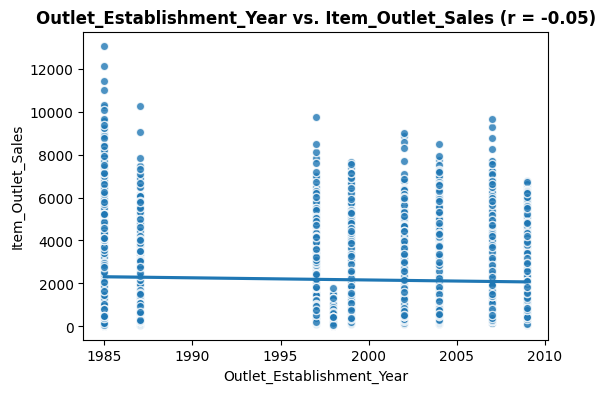

In [60]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    * No.
  - Does this feature appear to be a predictor of the target?
    * There is basically little to no correlation to outlet_sales.

##Outlet_Size


In [61]:
# # Confirming the dtype to select correct EDA function
feature = 'Outlet_Size'
#
df_sales[feature].dtype

dtype('O')

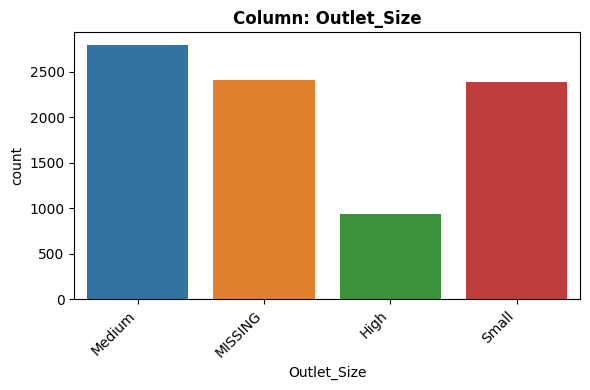

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [62]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Categorical (Ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  * 2410 nulls (28.28%)
  * We have defaulted the nulls to missing.


3. Is the feature constant or quasi-constant?
  * The feature is neither constant or quasi-constant.
  * The feature will remain in the dataset.

4. What is the cardinality? Is it high?
  * low only 4 unique values.

5. Would we know this BEFORE the target is determined?
  *  Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  * No.



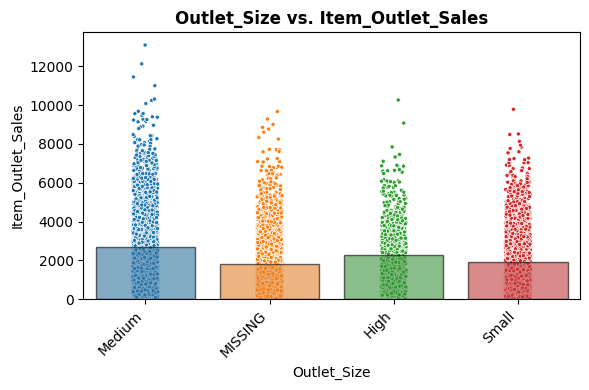

In [63]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    * No.
  - Does this feature appear to be a predictor of the target?
    * No

##Outlet_Location_Type


In [64]:
# # Confirming the dtype to select correct EDA function
feature = 'Outlet_Location_Type'
#
df_sales[feature].dtype

dtype('O')

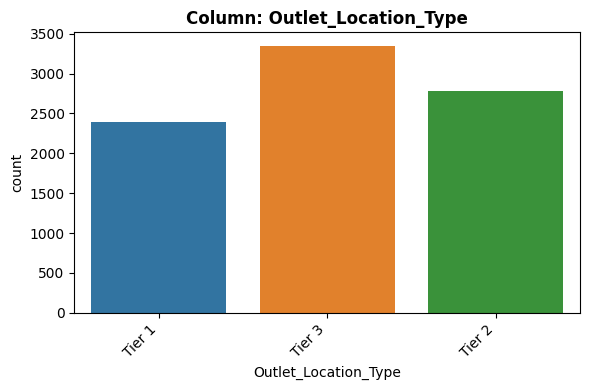

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [65]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Categorical (Ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  * 0 nulls (0)
  
3. Is the feature constant or quasi-constant?
  * The feature is neither constant or quasi-constant.
  * The feature will remain in the dataset.

4. What is the cardinality? Is it high?
  * low only 3 unique values.

5. Would we know this BEFORE the target is determined?
  *  Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  * No.



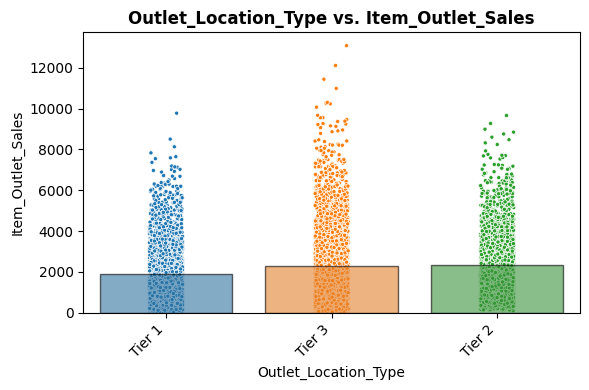

In [66]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    * Yes.
  - Does this feature appear to be a predictor of the target?
    * Yes. As the location (Tier) of the store shifts, so does the sales. Each store has its market but the better located outlets are pulling in larger sales figures.

##Outlet_Type


In [67]:
# # Confirming the dtype to select correct EDA function
feature = 'Outlet_Type'
#
df_sales[feature].dtype

dtype('O')

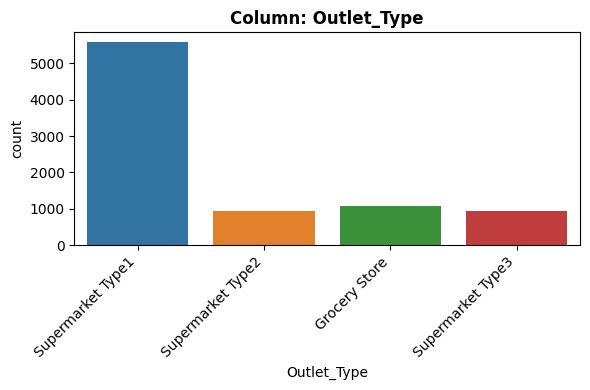

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [68]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  * 0 nulls (0%)
  * We have defaulted the nulls to missing.


3. Is the feature constant or quasi-constant?
  * The feature is neither constant or quasi-constant.
  * The feature will remain in the dataset.

4. What is the cardinality? Is it high?
  * low only 4 unique values.

5. Would we know this BEFORE the target is determined?
  *  Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  * No.



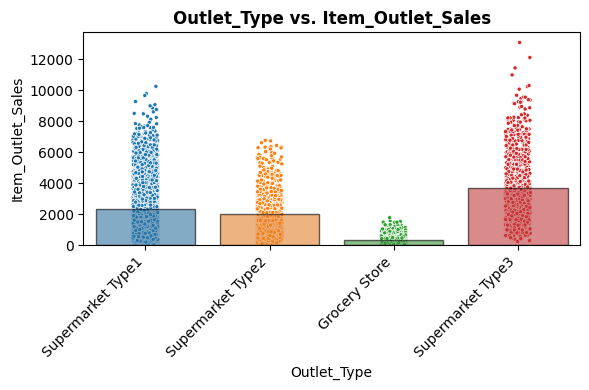

In [69]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    * Yes.
  - Does this feature appear to be a predictor of the target?
    * Yes. Different stores (outlets) cater to different customer needs.